In [1]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("abisee/cnn_dailymail", "1.0.0")
df = ds['train'].to_pandas()
# df.to_csv('cnn_dailymail.csv', index=False)

c:\Users\czajk\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

us_states = {
    "Alabama","Alaska","Arizona","Arkansas","California","Colorado",
    "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho",
    "Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana",
    "Maine","Maryland","Massachusetts","Michigan","Minnesota",
    "Mississippi","Missouri","Montana","Nebraska","Nevada",
    "New Hampshire","New Jersey","New Mexico","New York",
    "North Carolina","North Dakota","Ohio","Oklahoma","Oregon",
    "Pennsylvania","Rhode Island","South Carolina","South Dakota",
    "Tennessee","Texas","Utah","Vermont","Virginia","Washington",
    "West Virginia","Wisconsin","Wyoming","District of Columbia"
}

# Lowercase version for matching
states_lower = {s.lower() for s in us_states}


import re

# Load the CSV
gn = pd.read_csv("global-north-countries-2026.csv")

# Normalize
gn["country"] = gn["country"].str.strip().str.lower()

# Build a set of valid countries
uk_parts = ["england", "scotland", "wales", "northern ireland", "jersey", "britain"]
valid_countries = set(gn["country"].str.lower()) | set(uk_parts) | set(states_lower)
countries_sorted = sorted(valid_countries, key=len, reverse=True)

In [3]:
pattern = r'\b(' + '|'.join(re.escape(c) for c in countries_sorted) + r')\b'

df["country"] = (
    df["article"]
      .str.lower()
      .str.extract(pattern, expand=False)
)

country_corrections = {
    "britain": "united kingdom",
    "uk": "united kingdom",
    "england": "united kingdom",
    "scotland": "united kingdom",
    "wales": "united kingdom",
    "northern ireland": "united kingdom",
    "jersey": "united kingdom",
    "usa": "united states",
    "us": "united states"
}

for state in us_states:
    country_corrections[state.lower()] = "united states"

df["country"] = df["country"].replace(country_corrections)

In [4]:
n_missing = df["country"].isna().sum()
total = len(df)

print(f"Missing: {n_missing} ({n_missing/total:.2%})")

Missing: 61091 (21.28%)


In [5]:
df_clean = df[df["country"].notna()].copy()

gn_lookup = dict(zip(gn["country"], gn["GlobalNorthCountriesPartOfGlobalNorth"]))

df_clean["global_north"] = df_clean["country"].map(gn_lookup)

df_clean.head(10)

,article,highlights,id,country,global_north
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,united kingdom,Yes
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9,united states,Yes
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37,united states,Yes
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88,united states,Yes
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a,united states,Yes
5,"BAGHDAD, Iraq (CNN) -- Dressed in a Superman s...","Parents beam with pride, can't stop from smili...",a1ebb8bb4d370a1fdf28769206d572be60642d70,iraq,No
6,"BAGHDAD, Iraq (CNN) -- The women are too afrai...","Aid workers: Violence, increased cost of livin...",7c0e61ac829a3b3b653e2e3e7536cc4881d1f264,iraq,No
7,"BOGOTA, Colombia (CNN) -- A key rebel commande...",Tomas Medina Caracas was a fugitive from a U.S...,f0d73bdab711763e745cdc75850861c9018f235d,colombia,No
8,WASHINGTON (CNN) -- White House press secretar...,"President Bush says Tony Snow ""will battle can...",5e22bbfc7232418b8d2dd646b952e404df5bd048,united states,Yes
9,(CNN) -- Police and FBI agents are investigati...,Empty anti-tank weapon turns up in front of Ne...,613d6311ec2c1985bd44707d1796d275452fe156,united kingdom,Yes


C:\Users\czajk\AppData\Local\Temp\ipykernel_15340\4856817.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


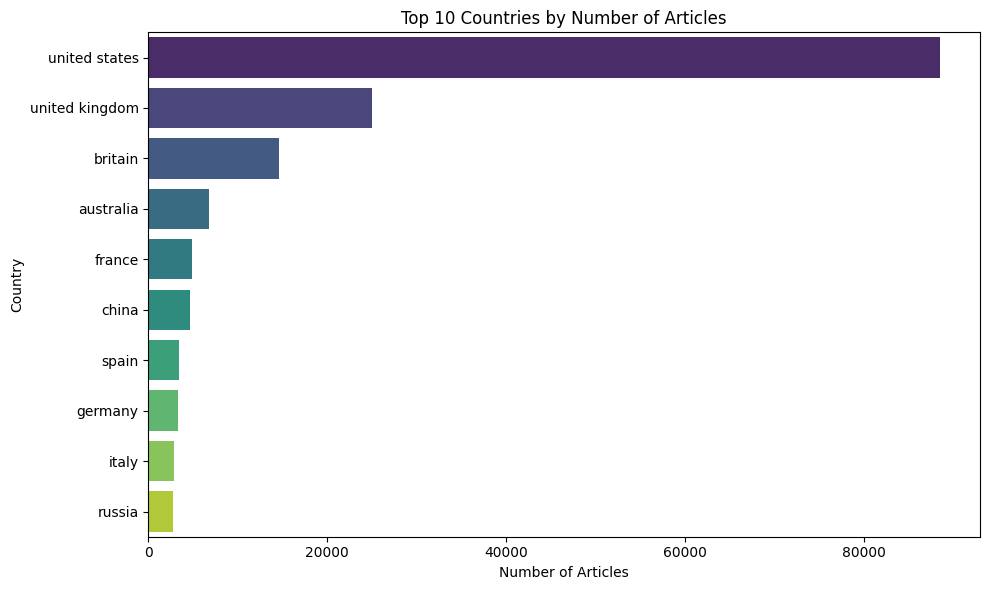

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count articles per country
country_counts = df_clean["country"].value_counts().head(10)

# Horizontal bar chart (easier to read for many categories)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
